https://www.tensorflow.org/tutorials/keras/basic_classification


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


/Users/jeremyw/miniconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [16]:
(tr_im,tr_lab),(tt_im,tt_lab) = fashion_mnist.load_data()

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [2]:
tr_im.shape

NameError: name 'tr_im' is not defined

In [19]:
tr_lab

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

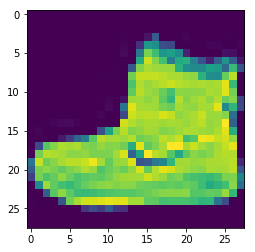

In [20]:
plt.imshow(tr_im[0,:,:])

In [21]:
tr_im.max()

255

In [22]:
tr_im = tr_im / tr_im.max()

In [23]:
tt_im = tt_im / tt_im.max()

In [141]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation=tf.nn.relu),
                        keras.layers.Dense(10,activation=tf.nn.softmax)])

In [142]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [143]:
model.fit(tr_im,tr_lab,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.4996 - acc: 0.8237
Epoch 2/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3722 - acc: 0.8665
Epoch 3/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.3323 - acc: 0.8788
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.3094 - acc: 0.8862
Epoch 5/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.2918 - acc: 0.8915


In [3]:
tt_loss,tt_acc = model.evaluate(tt_im,tt_lab)
tt_acc

NameError: name 'model' is not defined

In [145]:
predictions = model.predict(tt_im)

In [146]:
p_max = [np.argmax(p) for p in predictions]

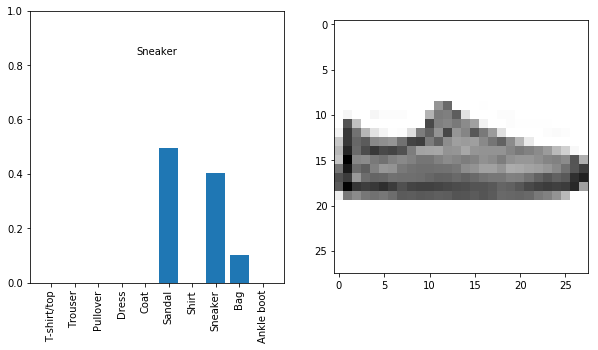

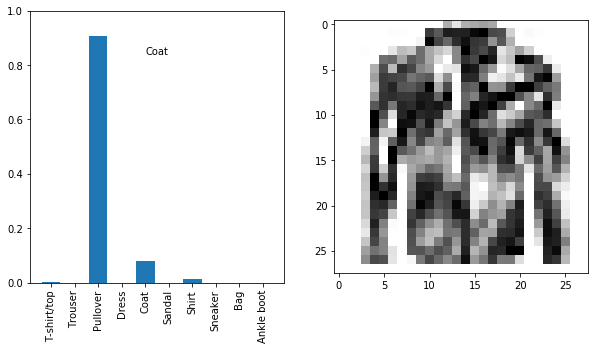

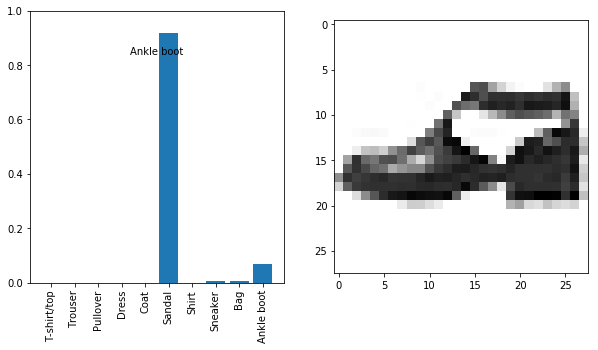

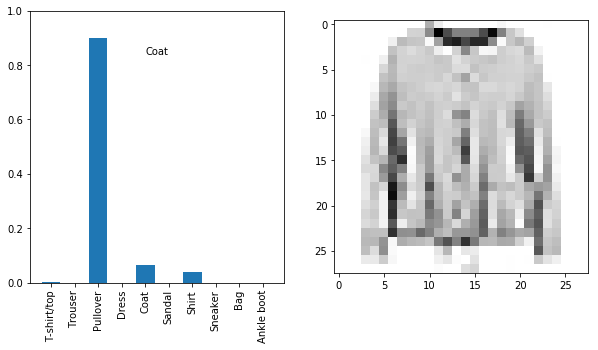

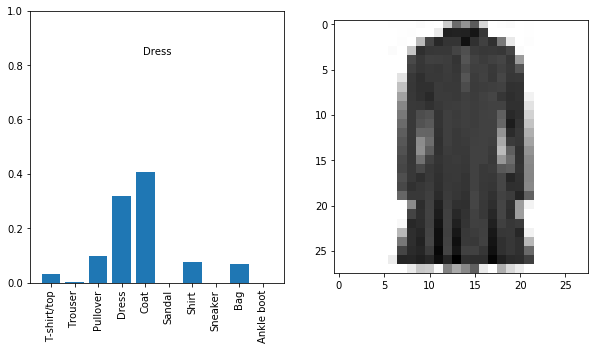

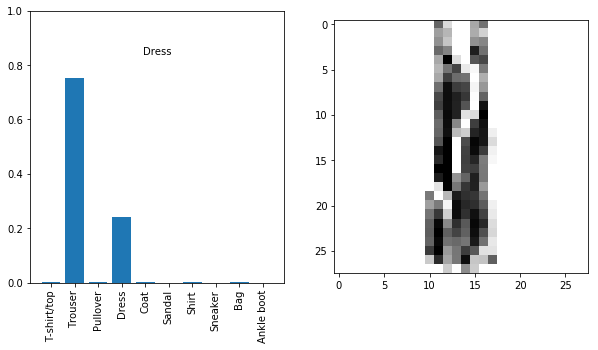

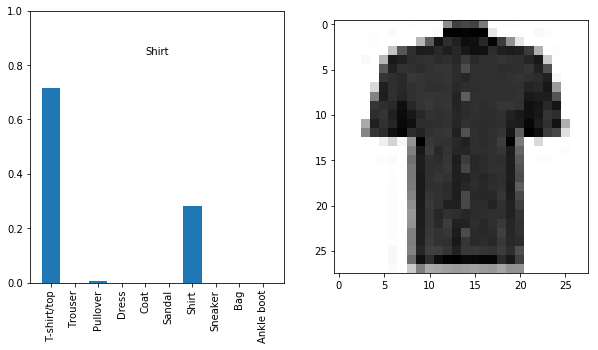

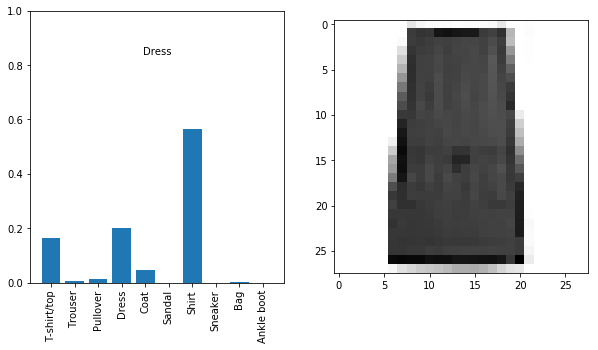

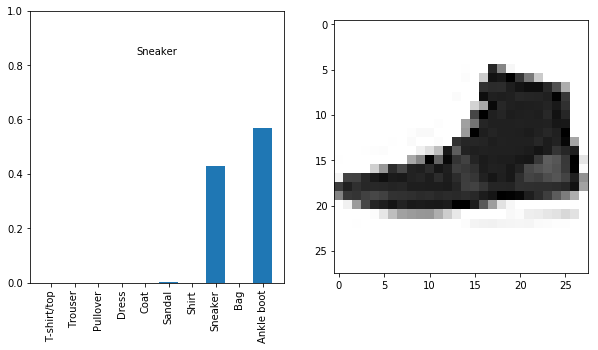

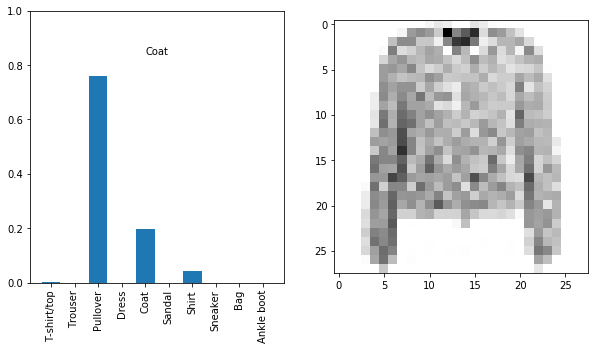

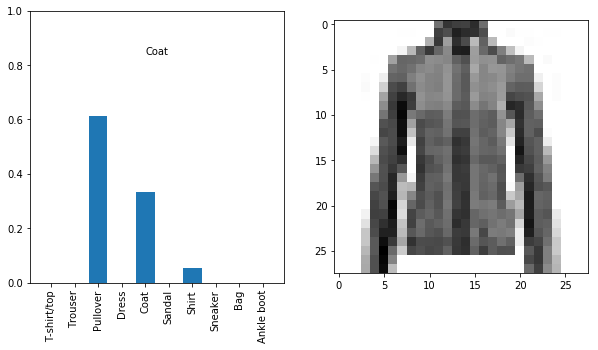

In [147]:
bins = np.arange(len(class_names))
wrong_count = 0
for p,pm,tl,ti in zip(predictions,p_max,tt_lab,tt_im): 
    if pm != tl:
        fig = plt.figure(figsize=(10,5))
        ax1,ax2 = plt.subplot(121),plt.subplot(122)
        ax1.bar(bins,p)
        ax1.set_xticks(bins)
        ax1.set_xticklabels(class_names,rotation=90)
        ax1.set_ylim(0,1)
        ax1.text(0.5,0.85,class_names[tl],transform=ax1.transAxes,ha="center",va="center")
        ax2.imshow(ti,cmap=plt.cm.gray_r)
        plt.show()
        wrong_count += 1
        if wrong_count > 10:
            break